# Self-Driving Car Engineer Nanodegree
## Deep Learning
## Project: Build a Traffic Sign Recognition Classifier

Jussi Wright / 29.6.2017

> **Note**: The writeup is a separate file, a markdown file and a pdf document.



![LeNet Architecture](lenet.png)

## Step 0: Parse and Load the Training Data


In [260]:
#Load pickled data
import pickle

import PIL
from PIL import Image 

training_file = 'train.p' # tulee olla samassa kansiossa tällä nimellä
validation_file= 'test.p'
testing_file = 'valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


### Splitting the dataset 

In [261]:
# Data splitting
from sklearn.model_selection import train_test_split

# Test set 20% of given dataset
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


## Step 1: Dataset Summary & Exploration

The basic summary of the Data

In [262]:
import numpy as np

n_train = len(y_train)                # Number of training examples
n_validation = len(y_valid)           # Number of validation dataset
n_test = len(y_test) 
n_classes = len(np.unique(y_train))   # Number of unique classes/labels in the dataset.

print("Number of images in dataset:")
print("All = ", n_train + n_test + n_validation)
print("Train = ", n_train)
print("Validation = ", n_validation)
print("Test = ", n_test)
print("Number of classes = ", n_classes)
print("Image Shape: {}".format(X_train[0].shape))

Number of images in dataset:
All =  44879
Train =  27839
Validation =  12630
Test =  4410
Number of classes =  43
Image Shape: (32, 32, 3)


### Visualization of the Dataset


Examples of Classes pictures


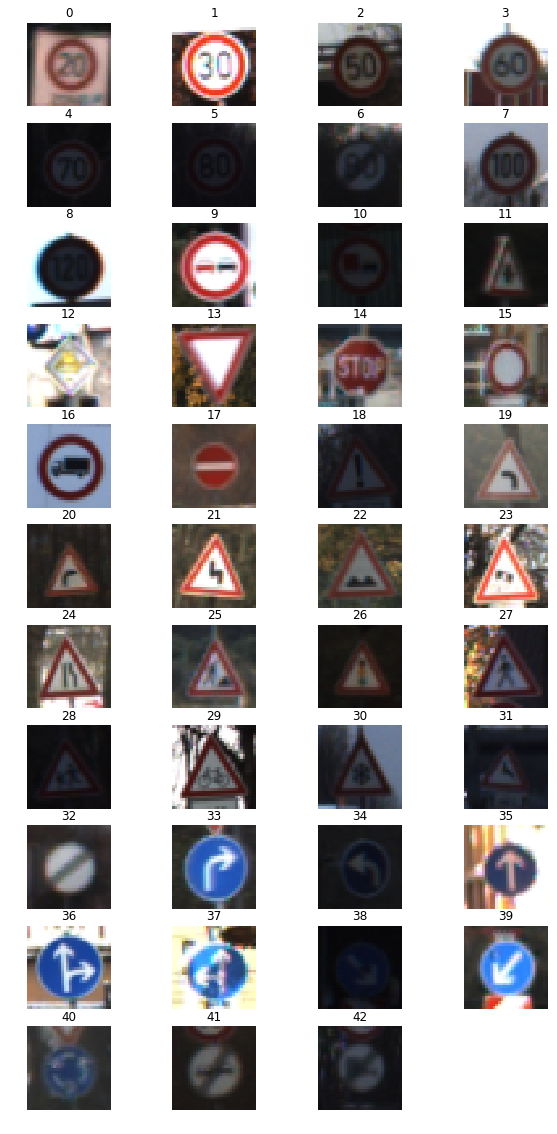

In [263]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# function for displaying images
print("Examples of Classes pictures")

num_of_samples=[]
plt.figure(figsize=(10, 20)) #väli, kuvan koko
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1) # Col, Row 
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #show the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))

plt.show()


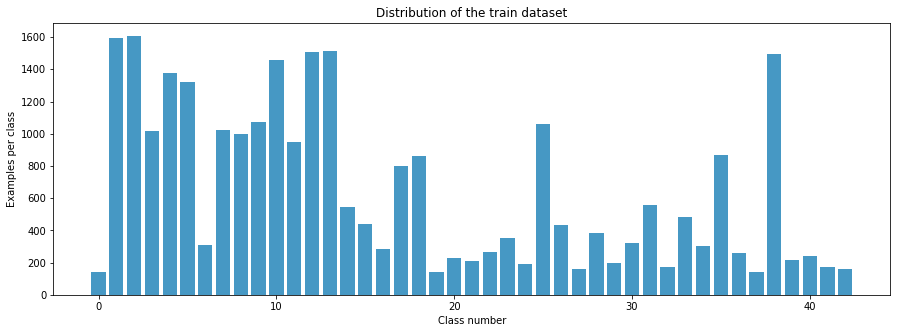

Min number of images per class = 141
Max number of images per class = 1607


In [264]:
#Plot number of images per class

plt.figure(figsize=(15, 5))
plt.bar(range(0, n_classes), num_of_samples, color='#4698c4')
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Examples per class")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

### Preprocessing the Data Set

- Shuffle
- Normalized data makes Gradient Descent faster. Done by the line of code X_train_normalized = (X_train - 128)/128.
- Grayscaling, reduce training time.
- Preprocessing is made with Min-Max Scaling normalization / preprocessing techniques 
- One-Hot Encoding was used to convert label numbers to vectors.



In [265]:
# Convert to grayscale
X_train_rgb = X_train
X_train_grey = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_grey = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_grey.shape)

RGB shape: (27839, 32, 32, 3)
Grayscale shape: (27839, 32, 32, 1)


In [266]:
X_train = X_train_grey
X_test = X_test_grey

print('done')

done


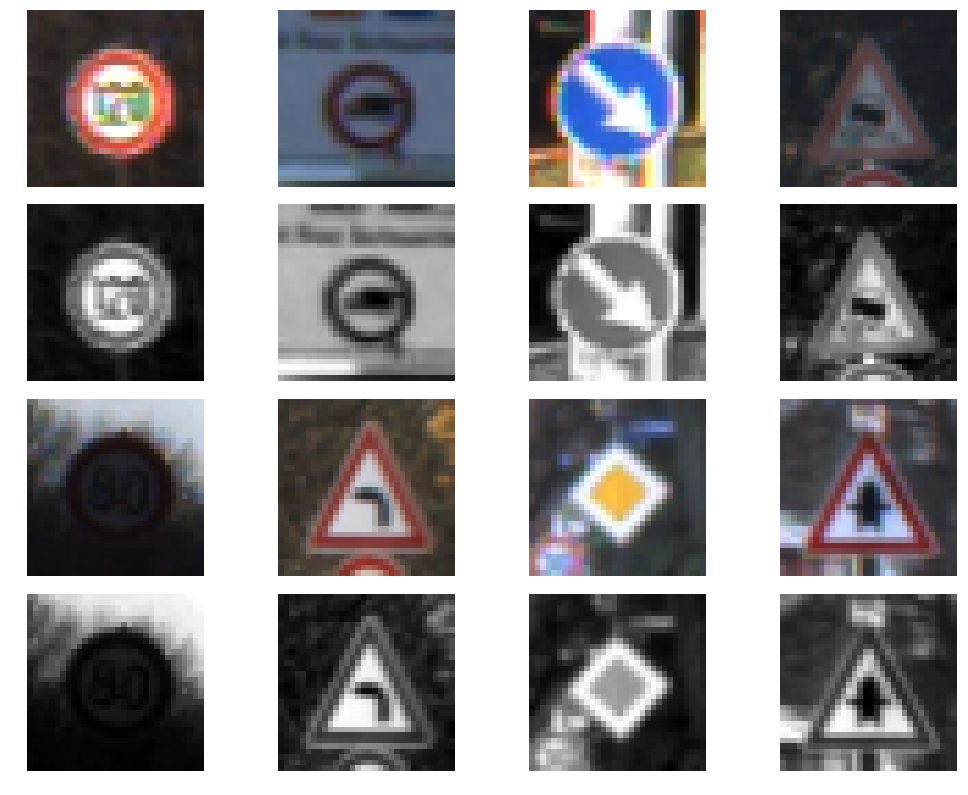

In [267]:

# Visualize rgb vs grayscale
n_rows = 4
n_cols = 4
offset = 9000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train_grey[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')

In [268]:
print(np.mean(X_train))
print(np.mean(X_test))

82.4681799088
83.5564273756


In [269]:
## Normalize the train and test datasets

X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

-0.355717344462
-0.347215411128


Original shape: (27839, 32, 32, 1)
Normalized shape: (27839, 32, 32, 1)


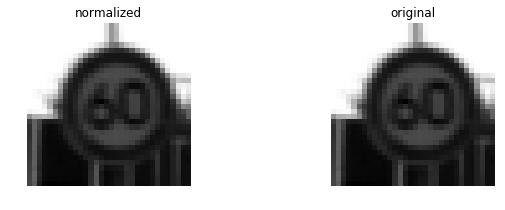

In [270]:
print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[0].squeeze(), cmap='gray')

shape in/out: (32, 32, 1) (32, 32, 1)


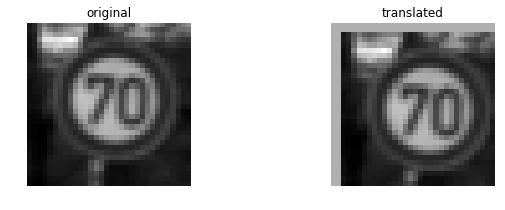

In [213]:
import cv2 

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 3
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = X_train_normalized[22222]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


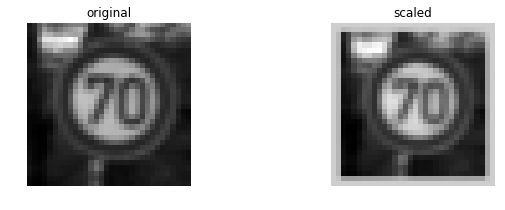

In [271]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-4,4)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


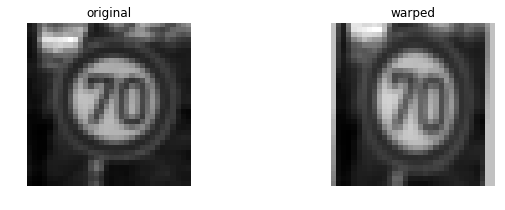

In [272]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.1   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.1

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('warped')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


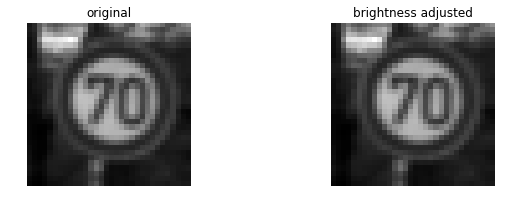

In [273]:
def random_brightness(img):
    shifted = img + 2.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)

In [274]:
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))

[ 142 1594 1607 1019 1377 1323  307 1026  996 1072 1456  948 1507 1515  544
  439  282  799  861  141  231  210  264  352  194 1059  435  162  382  197
  323  556  175  483  304  869  262  143 1496  215  238  174  160]
minimum samples for any label: 141


In [279]:
print('X, y shapes:', X_train_normalized.shape, y_train.shape) 

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 500:
        for i in range(500 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                 print('|', end='')
            elif i % 10 == 0:
                 print('+',end='')
    print('')
            
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

X, y shapes: (27839, 32, 32, 1) (22271,)
0 : |++++|++++|++++|++++|++++|++++|++++|+++
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |++++|++++|++++|++++|+++
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |++++|++
15 : |++++|++++|++++|
16 : |++++|++++|++++|++++|++++|++
17 : 
18 : 
19 : |++++|++++|++++|++++|++++|++++|++++|+++
20 : |++++|++++|++++|++++|++++|++++|+
21 : |++++|++++|++++|++++|++++|++++|++
22 : |++++|++++|++++|++++|++++|++
23 : |++++|++++|++++|++++|++
24 : |++++|++++|++++|++++|++++|++++|++++
25 : 
26 : |++++|++++|++++|
27 : |++++|++++|++++|++++|++++|++++|++++|+
28 : |++++|++++|++++|+++
29 : |++++|++++|++++|++++|++++|++++|++++
30 : |++++|++++|++++|++++|+++
31 : |++++
32 : |++++|++++|++++|++++|++++|++++|++++|+
33 : |++++|++++|+
34 : |++++|++++|++++|++++|++++|
35 : 
36 : |++++|++++|++++|++++|++++|++++
37 : |++++|++++|++++|++++|++++|++++|++++|+++
38 : 
39 : |++++|++++|++++|++++|++++|++++|++
40 : |++++|++++|++++|++++|++++|++++|+
41 : |++++|++++|++++|++++|++++|++++|++++|
42 : |++++|++++|++++|++++|++++|

IndexError: index 29039 is out of bounds for axis 0 with size 27839

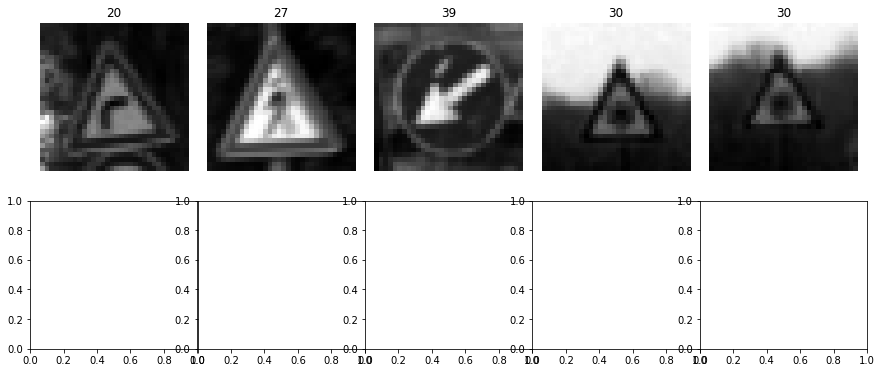

In [218]:
# show comparisons of 5 random augmented data points
choices = list(range(len(input_indices)))
picks = []
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train_normalized[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(y_train[input_indices[picks[i]]])
for i in range(5):
    image = X_train_normalized[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(y_train[output_indices[picks[i]]])

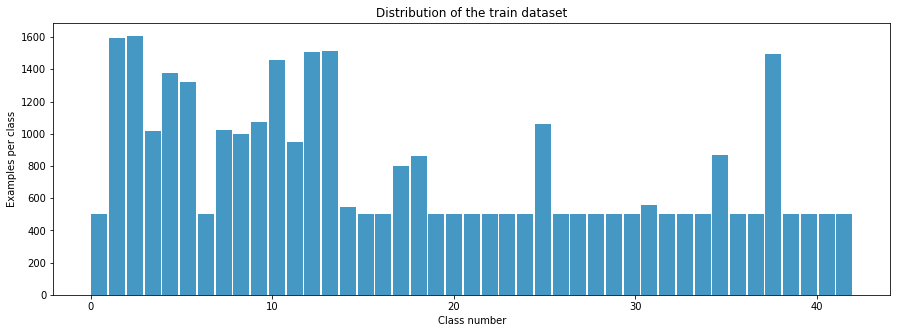

In [219]:
# histogram of label frequency
np.histogram(y_train, n_classes)

# taulukon graafiset määrittelyt
plt.figure(figsize=(15, 5))
plt.bar(center, hist, align='center', width=width, color='#4698c4')
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Examples per class")
plt.show()

In [ ]:
print(np.bincount(class_n))
print("minimum samples for any label:", min(np.bincount(class_n)))

### Data augementation

#### Data analyze
In original data has too much differences between the classes.

Solution: Create more data to balance the number of inputs. 

Made by making copies randomly translating, scaling, twisting, and adjusting brightness of the images.

Result: The data is more balanced, and each class has at least 500 images.



## Step 2: Design and Test of the Model Architecture
Design, train and test the model that learns to recognize traffic signs. 
Use the German Traffic Sign Dataset.
 
Validation accuracy should be at least 0.93.

here are various aspects to consider when thinking about this problem:
- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a published baseline model on this problem. It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers

In [276]:
## Shuffle the training dataset

from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

print('done')

done


In [277]:
## Split validation dataset off from training dataset

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))

Old X_train size: 27839
New X_train size: 22271
X_validation size: 5568


### CNN Arcitecture

Model based on the LeNet model.
Modifications: 2 Dropouts

![LeNet Architecture](lenet.png)

- **Layer 1: Convolutional.** Output 28x28x6
   - Activation (ReLU)
   - Pooling (MAxPool) Output 14x14x6
- **Layer 2: Convolutional.** Output10x10x16
    - Activation (ReLU)
    - Pooling (MAxPool) Output 5x5x16. (
- Flatten 3D->1D(done: `tf.contrib.layers.flatten`) Output 400
- **Layer 3: Fully Connected.** Output 120
   - Activation (ReLU)
   - Dropout
- **Layer 4: Fully Connected.** Output 84
   - Activation (ReLU)
   - Dropout
- **Layer 5: Fully Connected.** Output 10 (84) 
   - Logits
#### Output
Return the result of the 2nd fully connected layer.

In [223]:
import tensorflow as tf
#Setup TensorFlow, The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.
#Parameters for training
EPOCHS = 50
BATCH_SIZE = 100
rate = 0.001 #for Adams optimazer

In [224]:

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # Layer 1: Activation.
    x = tf.nn.relu(x)
    
    # Layer 1: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
                     
    # Layer 2: Activation.
    x = tf.nn.relu(x)

    # Layer 2: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))    
    x = tf.add(tf.matmul(x, W3), b3)
    
    # Layer 3: Activation.
    x = tf.nn.relu(x)
    
    # Layer 3: Dropout
    x = tf.nn.dropout(x, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84)) 
    x = tf.add(tf.matmul(x, W4), b4)
    
    # Layer 4: Activation.
    x = tf.nn.relu(x)
    
    # Layer 4: Dropout
    x = tf.nn.dropout(x, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, W5), b5)
    
    return logits

print('done')


done


## Features and Labels

In [225]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

print('done')

done


In [226]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)


In [227]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


## CNN Training

CNNs was trained with the Adam optimizer and batch size was 100 images. The model was trained for 50 epochs (55678 images in each epoch) with one dataset. Trainin parametry was (0.001), Hyperparameters was mu (0) and sigma (0.1).

The loss was 0,987 and accuracy 0,958.

### Train the Model


In [228]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
       
    saver.save(sess, 'lenet_JW')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.480

EPOCH 2 ...
Validation Accuracy = 0.788

EPOCH 3 ...
Validation Accuracy = 0.870

EPOCH 4 ...
Validation Accuracy = 0.900

EPOCH 5 ...
Validation Accuracy = 0.916

EPOCH 6 ...
Validation Accuracy = 0.940

EPOCH 7 ...
Validation Accuracy = 0.948

EPOCH 8 ...
Validation Accuracy = 0.956

EPOCH 9 ...
Validation Accuracy = 0.961

EPOCH 10 ...
Validation Accuracy = 0.963

EPOCH 11 ...
Validation Accuracy = 0.972

EPOCH 12 ...
Validation Accuracy = 0.967

EPOCH 13 ...
Validation Accuracy = 0.972

EPOCH 14 ...
Validation Accuracy = 0.972

EPOCH 15 ...
Validation Accuracy = 0.977

EPOCH 16 ...
Validation Accuracy = 0.975

EPOCH 17 ...
Validation Accuracy = 0.978

EPOCH 18 ...
Validation Accuracy = 0.977

EPOCH 19 ...
Validation Accuracy = 0.978

EPOCH 20 ...
Validation Accuracy = 0.982

EPOCH 21 ...
Validation Accuracy = 0.980

EPOCH 22 ...
Validation Accuracy = 0.980

EPOCH 23 ...
Validation Accuracy = 0.982

EPOCH 24 ...
Validation Accura

# Step 3: Test a Model on New Images

### Output Top 5 Softmax Probabilities For Each Image Found on the Web
For each of the new images, print out the model's softmax probabilities to show the certainty of the model's predictions (limit the output to the top 5 probabilities for each image). tf.nn.top_k could prove helpful here.
The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.
tf.nn.top_k will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.
Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. tk.nn.top_k is used to choose the three classes with the highest probability:


### Load and Output the Images

In [231]:

from IPython.display import Image, HTML, display
from glob import glob
imagesList=''.join( ["<img style='width: 120px; margin: 5px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
                 for s in sorted(glob('new_images/*.jpg')) ])
display(HTML(imagesList))


In [229]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

print('done')


done


(8, 32, 32, 1)


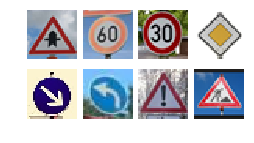

In [235]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('new_images/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

### Predict the Sign Type for Each Image

In [236]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

my_labels = [11, 1, 12, 38, 34, 18, 25, 3]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet_JW.meta')
    saver3.restore(sess, "./lenet_JW")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.125


### Analyze Performance

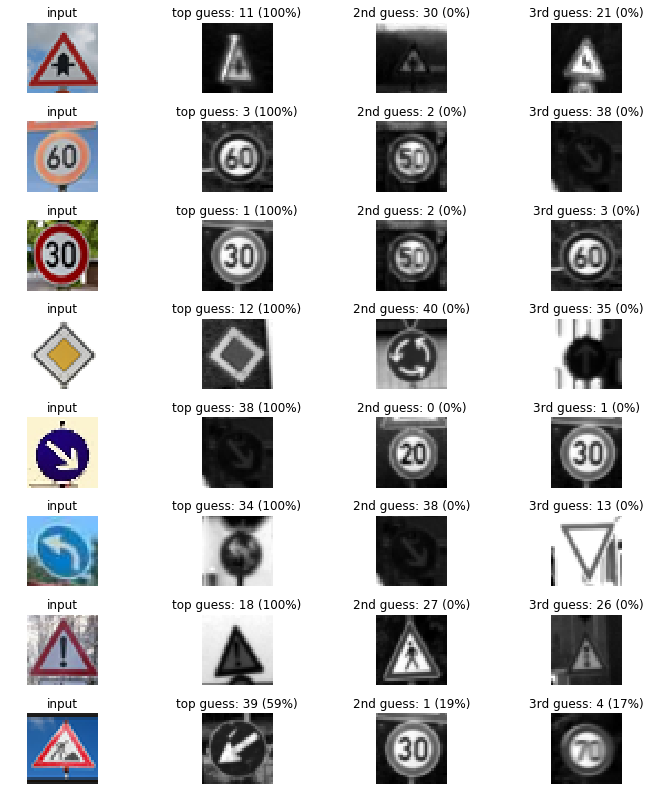

In [237]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_JW.meta')
    saver.restore(sess, "./lenet_JW")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [186]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet_JW")
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.955


### How to improve this model?
    
- Different networ architectures
- Chance dimensions of the LeNet layers
- Add recularisation features (Dropout or L2) to make sure that Network doest overfit the training data
- Tune the hyperparameters
- Improve the data preprosessing (normalization)
- more augmenting data by rotating, fliping, sifting or chancing colours
